In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv('historical_data.csv',encoding='unicode_escape',parse_dates=['date'])
data.fillna(0,inplace=True)
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0,0.0,1990-02-01 00:00:00
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,0,Industrial Area,3.1,7.0,0.0,0.0,0,0.0,1990-02-01 00:00:00
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0,0.0,1990-02-01 00:00:00
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0,0.0,1990-03-01 00:00:00
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,0,Industrial Area,4.7,7.5,0.0,0.0,0,0.0,1990-03-01 00:00:00


In [8]:
data.isnull().sum()

stn_code                       0
sampling_date                  0
state                          0
location                       0
agency                         0
type                           0
so2                            0
no2                            0
rspm                           0
spm                            0
location_monitoring_station    0
pm2_5                          0
date                           0
dtype: int64

In [9]:
#Function to calculate so2 individual pollutant index(si)
def calculate_si(so2):
    si=0
    if (so2<=40):
        si= so2*(50/40)
    if (so2>40 and so2<=80):
        si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
        si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
        si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
        si= 300+(so2-800)*(100/800)
    if (so2>1600):
        si= 400+(so2-1600)*(100/800)
    return si
data['si']=data['so2'].apply(calculate_si)
df= data[['so2','si']]
df.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [10]:
#Function to calculate no2 individual pollutant index(ni)
def calculate_ni(no2):
    ni=0
    if(no2<=40):
        ni= no2*50/40
    elif(no2>40 and no2<=80):
        ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
        ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
        ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
        ni= 300+(no2-280)*(100/120)
    else:
        ni= 400+(no2-400)*(100/120)
    return ni
data['ni']=data['no2'].apply(calculate_ni)
df= data[['no2','ni']]
df.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [11]:
#Function to calculate no2 individual pollutant index(rpi)
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
        rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
        rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
        rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
        rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
        rpi=300+(rpi-120)*(100/130)
    else:
        rpi=400+(rpi-250)*(100/130)
    return rpi
data['rpi']=data['rspm'].apply(calculate_si)
df= data[['rspm','rpi']]
df.tail()
#many data values of rspm values is unawailable since it was not measure before

,rspm,rpi
435737,143.0,121.000000
435738,171.0,130.333333
435739,0.0,0.000000
435740,0.0,0.000000
435741,0.0,0.000000


In [12]:
#Function to calculate no2 individual pollutant index(spi)
def calculate_spi(spm):
    spi=0
    if(spm<=50):
        spi=spm
    if(spm<50 and spm<=100):
        spi=spm
    elif(spm>100 and spm<=250):
        spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
        spi=200+(spm-250)
    elif(spm>350 and spm<=450):
        spi=300+(spm-350)*(100/80)
    else:
        spi=400+(spm-430)*(100/80)
    return spi
data['spi']=data['spm'].apply(calculate_spi)
df= data[['spm','spi']]
df.tail()
#many data values of spm values is unawailable since it was not measure before

,spm,spi
435737,0.0,0.0
435738,0.0,0.0
435739,0.0,0.0
435740,0.0,0.0
435741,0.0,0.0


# Sulphur Dioxide (SO₂) index
# Nitrogen Dioxide (NO₂) index
# Suspended Particulate Matter (SPM/PM2.5) index
# Respirable Suspended Particulate Matter (RSPM/PM10) index

---> The AQI is determined by the pollutant with the highest index value among these four pollutants (si, ni, spi, rpi).
---> The function uses if conditions to compare the pollutant index values and returns the highest one as the AQI. 

In [13]:
#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
        aqi=si
    if(spi>si and spi>ni and spi>rpi):
        aqi=spi
    if(ni>si and ni>spi and ni>rpi):
        aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
        aqi=rpi
    return aqi
data['AQI']=data.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
df= data[['sampling_date','state','si','ni','rpi','spi','AQI']]
df.head()

,sampling_date,state,si,ni,rpi,spi,AQI
0,February - M021990,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,February - M021990,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,February - M021990,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,March - M031990,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,March - M031990,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [14]:
def AQI_range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "unhealthy"
    elif x>300 and x<=400:
        return "Very Unhealthy"
    elif x>400:
        return "Hazardous"
    
data['AQI_range']=data['AQI'].apply(AQI_range)
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,si,ni,rpi,spi,AQI,AQI_range
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0,0.0,1990-02-01 00:00:00,6.000,21.750,0.0,0.0,21.750,Good
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,0,Industrial Area,3.1,7.0,0.0,0.0,0,0.0,1990-02-01 00:00:00,3.875,8.750,0.0,0.0,8.750,Good
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0,0.0,1990-02-01 00:00:00,7.750,35.625,0.0,0.0,35.625,Good
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0,0.0,1990-03-01 00:00:00,7.875,18.375,0.0,0.0,18.375,Good
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,0,Industrial Area,4.7,7.5,0.0,0.0,0,0.0,1990-03-01 00:00:00,5.875,9.375,0.0,0.0,9.375,Good


In [15]:
data['AQI_range'].value_counts()

AQI_range
Poor              224285
Moderate           86450
Good               56947
unhealthy          33510
Hazardous          18701
Very Unhealthy     15849
Name: count, dtype: int64

In [17]:
state=pd.read_csv('poptable.csv')
state.head()

,latitude,longitude,state
0,11.667026,92.735983,Andaman And Nicobar
1,14.750429,78.570026,Andhra Pradesh
2,27.100399,93.616601,Arunachal Pradesh
3,26.749981,94.216667,Assam
4,25.785414,87.479973,Bihar


In [18]:
df.head()

,sampling_date,state,si,ni,rpi,spi,AQI
0,February - M021990,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,February - M021990,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,February - M021990,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,March - M031990,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,March - M031990,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [19]:
dff=pd.merge(state.set_index("state"),df.set_index("state"),right_index=True,left_index=True).reset_index()
dff.head()

,state,latitude,longitude,sampling_date,si,ni,rpi,spi,AQI
0,Andhra Pradesh,14.750429,78.570026,February - M021990,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,14.750429,78.570026,February - M021990,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,14.750429,78.570026,February - M021990,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,14.750429,78.570026,March - M031990,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,14.750429,78.570026,March - M031990,5.875,9.375,0.0,0.0,9.375


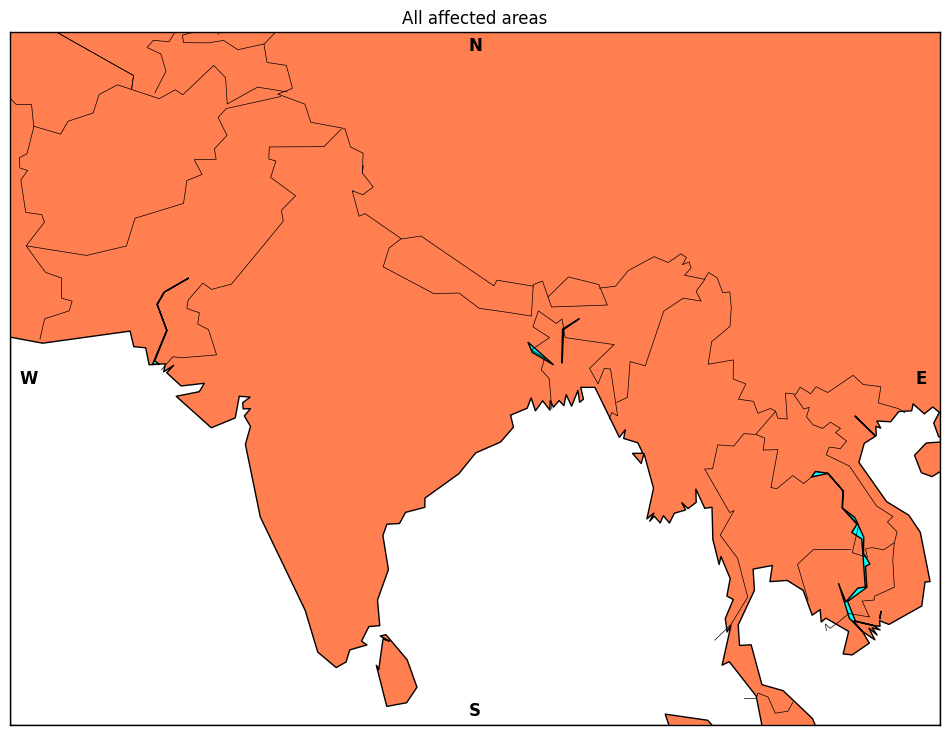

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Initialize the Basemap
m = Basemap(projection='mill', llcrnrlat=5, urcrnrlat=40, llcrnrlon=60, urcrnrlon=110, lat_ts=20, resolution='c')

# Convert latitude and longitude to map projection coordinates
longitudes = dff["latitude"].tolist()
latitudes = dff["longitude"].tolist()
x, y = m(longitudes, latitudes)

# Create the plot
fig = plt.figure(figsize=(12, 10))
plt.title("All affected areas")

# Plot the data points
m.plot(x, y, "o", markersize=3, color='blue')

# Draw coastlines, continents, and boundaries
m.drawcoastlines()
m.fillcontinents(color='coral', lake_color='aqua')
m.drawmapboundary()
m.drawcountries()

# Get the map corners in map projection coordinates
map_width = m.xmax - m.xmin
map_height = m.ymax - m.ymin

# Define positions for the compass directions relative to the map boundaries
compass_positions = {
    'N': (m.xmin + map_width / 2, m.ymax * 0.98),
    'S': (m.xmin + map_width / 2, m.ymin + map_height * 0.02),
    'E': (m.xmax * 0.98, m.ymin + map_height / 2),
    'W': (m.xmin + map_width * 0.02, m.ymin + map_height / 2),
}

# Add text annotations for the compass directions
for direction, position in compass_positions.items():
    plt.text(position[0], position[1], direction, ha='center', va='center', fontsize=12, fontweight='bold')

# Show the plot
plt.show()


In [23]:
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,si,ni,rpi,spi,AQI,AQI_range
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0,0.0,1990-02-01 00:00:00,6.000,21.750,0.0,0.0,21.750,Good
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,0,Industrial Area,3.1,7.0,0.0,0.0,0,0.0,1990-02-01 00:00:00,3.875,8.750,0.0,0.0,8.750,Good
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0,0.0,1990-02-01 00:00:00,7.750,35.625,0.0,0.0,35.625,Good
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0,0.0,1990-03-01 00:00:00,7.875,18.375,0.0,0.0,18.375,Good
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,0,Industrial Area,4.7,7.5,0.0,0.0,0,0.0,1990-03-01 00:00:00,5.875,9.375,0.0,0.0,9.375,Good


In [31]:
data[['AQI','year']].groupby('year').median().reset_index().sort_values(by='year',ascending=False)

,year,AQI
29,2015,102.000000
28,2014,102.000000
27,2013,103.000000
26,2012,103.666667
25,2011,108.000000
24,2010,118.666667
23,2009,159.666667
22,2008,156.666667
21,2007,150.000000
20,2006,152.000000


<Axes: xlabel='year', ylabel='AQI'>

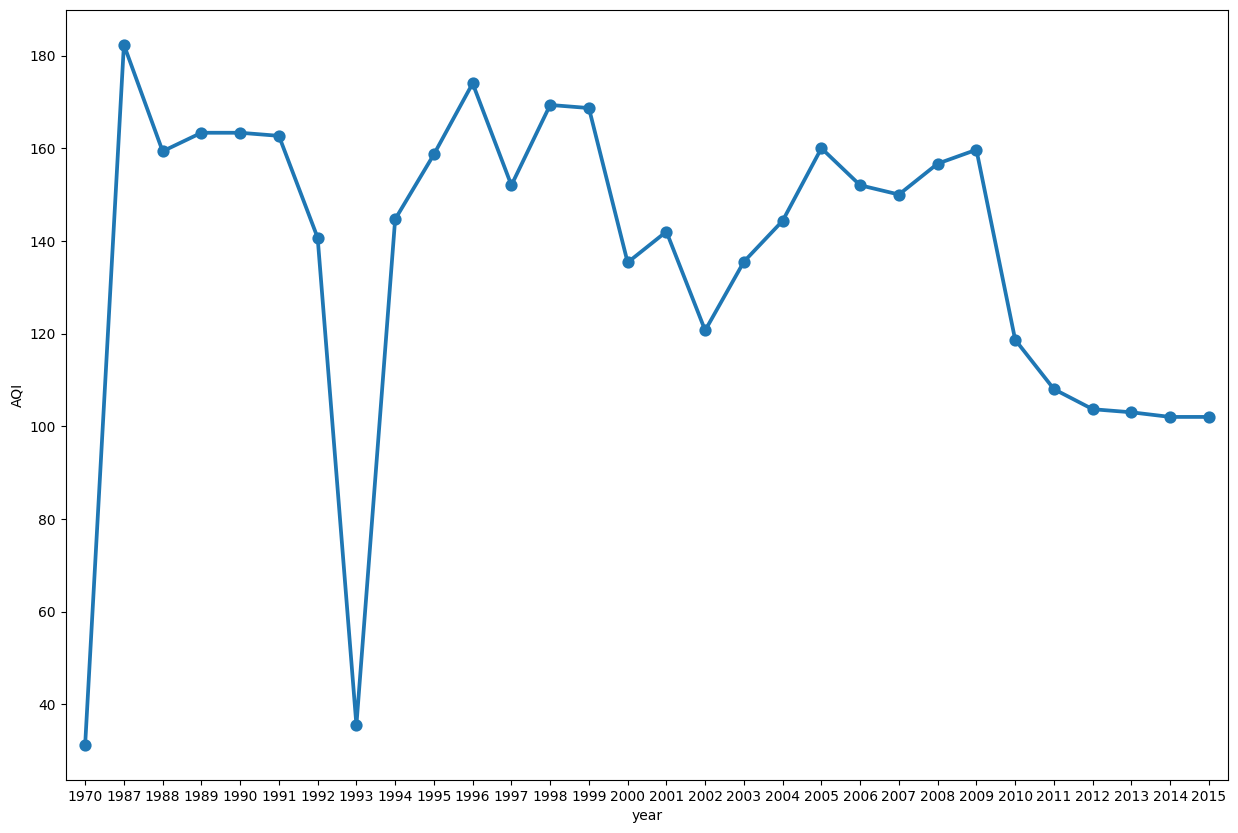

In [30]:
#Visualization of AQI across india 

data['date'] = pd.to_datetime(data['date']) # date parse
data['year'] = data['date'].dt.year # year
data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]

df = data[['AQI','year']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='year', y='AQI', data=df)

In [32]:
#setting up date parameter
import warnings
import itertools
import dateutil
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
df=data[['AQI','date']]
df["date"] = pd.to_datetime(df['date'])
df.tail(20)

,AQI,date
435722,118.333333,2015-11-05
435723,118.666667,2015-11-07
435724,140.666667,2015-11-10
435725,133.666667,2015-11-11
435726,105.000000,2015-11-16
435727,112.666667,2015-11-20
435728,121.333333,2015-11-26
435729,120.000000,2015-11-29
435730,120.666667,2015-12-03
435731,125.000000,2015-12-06


In [33]:
df=df.set_index('date').resample('M')['AQI'].mean()
df.head()

date
1970-01-31    49.654762
1970-02-28          NaN
1970-03-31          NaN
1970-04-30          NaN
1970-05-31          NaN
Freq: M, Name: AQI, dtype: float64

In [35]:
#preprocessing the data values
data=df.reset_index(level=0, inplace=False)
data = data[np.isfinite(data['AQI'])]
data=data[data.date != '1970-01-31']
data = data.reset_index(drop=True)
data.head()

,date,AQI
0,1987-01-31,242.438652
1,1987-02-28,235.787929
2,1987-03-31,294.558772
3,1987-04-30,202.012681
4,1987-05-31,307.991667


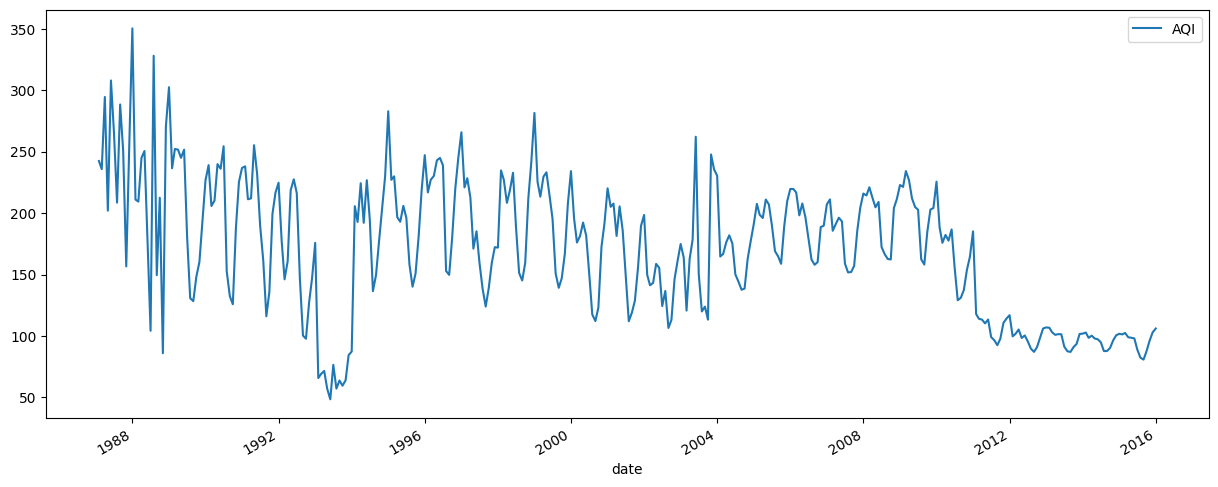

In [42]:
#visualizing the processed data of AQI

df=data.set_index('date')
df.sort_values(by='date',ascending=False)
df.plot(figsize=(15, 6))
plt.show()
y=df.AQI


In [44]:
#exctracting knowledge about data

#spliting dataframes into test and train
n = df.shape[0]
train_size = 0.65

features_dataframe = df.sort_values('date')
train = df.iloc[:int(n * train_size)]
test = df.iloc[int(n * train_size):]

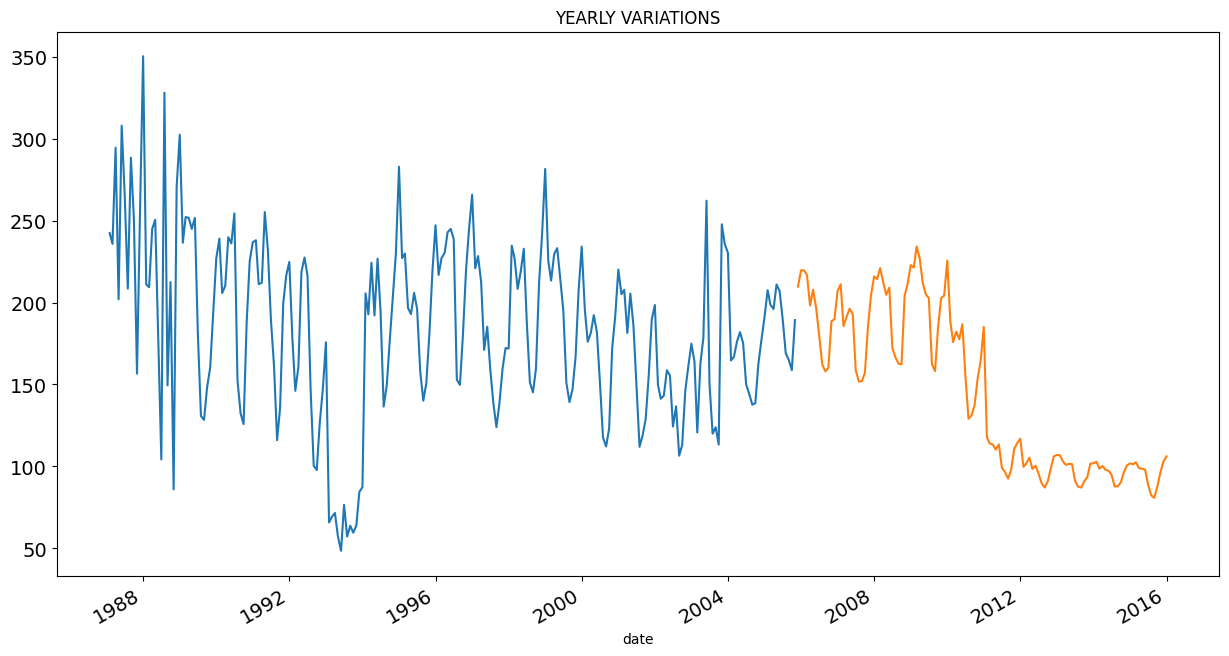

In [45]:
#plotting the yearly variations of AQI

train.AQI.plot(figsize=(15,8), title= 'YEARLY VARIATIONS', fontsize=14)
test.AQI.plot(figsize=(15,8), title= 'YEARLY VARIATIONS', fontsize=14)
plt.show()

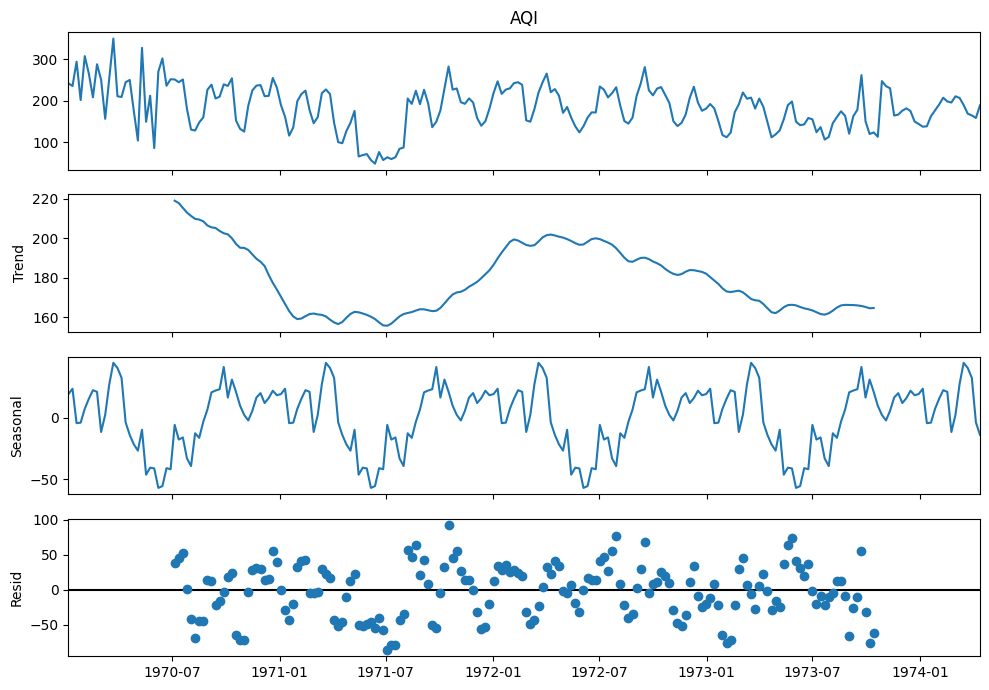

In [46]:
#various statmodel to identity huge variations od data values
import statsmodels.api as sm
train.index=pd.date_range(freq="w", start=0 ,periods=224)

sm.tsa.seasonal_decompose(train.AQI).plot()
result = sm.tsa.stattools.adfuller(train.AQI)
plt.show()